In [ ]:
# Elements
import sys
if '..//' not in sys.path:
    sys.path.append('..//')

import os
from opmsim.optical_system_base import OpticalSystem
from opmsim import optical_elements
from opmsim import dipole_source
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline 
#notebook

np.set_printoptions(threshold=sys.maxsize)

savepath = "Z:/User data/Leo Rowe-Brown/OPMsim_output/thesis_figs/"

ndipoles = 5000
nrays = 10000

## Optical setups
O1 = optical_elements.SineLens(NA=1.2, focal_length=0.180/60, n=1.33)
TL1 = optical_elements.SineLens(NA=0.1, focal_length=0.180, n=1)
TL2 = optical_elements.SineLens(NA=0.1, focal_length=0.162, n=1)
O2 = optical_elements.SineLens(NA=0.95, focal_length=0.180/50, n=1)
O3 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1)
O3_35 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=35*np.pi/180)
O3_45 = optical_elements.SineLens(NA=0.6, focal_length=0.200/40, n=1, yAxis_rotation=45*np.pi/180)
TL3 = optical_elements.SineLens(NA=0.1, focal_length=0.1013, n=1)
QWP = optical_elements.WavePlate(np.pi/4, np.pi/2)
LP = optical_elements.LinearPolariser(np.pi/2)
LP2 = optical_elements.LinearPolariser(0)

AgSiO2_mirror35 = optical_elements.FlatMirror(35*np.pi/360, 158e-9, perfect_mirror=False, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")
AgSiO2_mirror45 = optical_elements.FlatMirror(45*np.pi/360, 158e-9, perfect_mirror=False, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")

AgSiO2_mirror35_sio = optical_elements.FlatMirror(35*np.pi/360, 200e-9, perfect_mirror=False, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output",\
                                            n_film_file = "../refractive_index_data/SiO.txt")
AgSiO2_mirror35_sio = optical_elements.FlatMirror(35*np.pi/360, 200e-9, perfect_mirror=False, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output",\
                                            n_film_file = "../refractive_index_data/SiO.txt")

perf_mirror35 = optical_elements.FlatMirror(35*np.pi/360, 158e-9, perfect_mirror=True, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")
perf_mirror45 = optical_elements.FlatMirror(45*np.pi/360, 158e-9, perfect_mirror=True, reflectance=1,\
                                            fresnel_debug_savedir="C:/Users/lnr19/code/OPMsim/output")

OPM_35_system = [O1, TL1, TL2, O2, O3_35]
OPM_45_system = [O1, TL1, TL2, O2, O3_45]


s_pol = 'S-polarised excitation'
p_pol = 'P-polarised excitation'
un_pol = 'depolarised fluorophores'

exc = lambda opm_angle: [(np.pi/2, 0), (0, opm_angle*np.pi/180), None]

pol_text = [s_pol, p_pol, un_pol]

title_base_opm = r'Intensity distribution in exit pupil for OPM: $\theta_{OPM} = %d^{\circ}$, ' % opm_angle
title_base_dopm = r'Intensity distribution in exit pupil for dOPM: $\theta_{OPM} = %d^{\circ}$, ' % opm_angle

opm_angles = [35, 45]
exc_orientation

In [ ]:
## OPM at 35 degrees
source = dipole_source.DipoleSource()
source.generate_dipoles(ndipoles)

savename_prefix = 'opm_35_pupil_plot_'
exc_35 = exc(35)

plot_options['title'] = r'Intensity in exit pupil for OPM: $\theta_{OPM} = 35^{\circ}$, S-polarised excitation, static fluorophores'
   
plot_options['title'] = title_base_opm  
    
system = OpticalSystem("OPM system (35 degrees) out-of-plane excitation steady state", elements, source, options)
system.trace()
pupil_fig2 = system.detector.plot_pupil(**plot_options)
pupil_fig2.savefig(os.path.join(savepath_full, "pupil_plot_steady_state_oop-xz_35.png"), bbox_inches='tight')

plot_options['title'] = r'Intensity incident on O1 for OPM: $\theta_{OPM} = 35^{\circ}$, S-polarised excitation, static fluorophores'
pupil_fig2_i = system.initial_detector.plot_pupil(**plot_options)
pupil_fig2_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_steady_state_oop-xz_35.png"), bbox_inches='tight')

In [ ]:
## OPM at 45 degrees 
source = dipole_source.DipoleSource()
source.generate_dipoles(ndipoles)

savename_prefix = 'opm_45_pupil_plot_'

exc = [(np.pi/2, 0), (0, 45*np.pi/180), None]
source.classical_photoselection((0,45*np.pi/180))

system45 = OpticalSystem("OPM system (45 degrees) in-plane excitation steady state", elements45, source, options)
system45.trace()

plot_options['title'] = r'Intensity in exit pupil for OPM: $\theta_{OPM} = 45^{\circ}$, S-polarised excitation, static fluorophores'
pupil_fig = system45.detector.plot_pupil(**plot_options)
pupil_fig.savefig(os.path.join(savepath_full, "pupil_plot_steady_state_oop-xz_45.png"),bbox_inches='tight' )

plot_options['title'] = r'Intensity incident on O1 for OPM: $\theta_{OPM} = 45^{\circ}$, S-polarised excitation, static fluorophores'
pupil_fig2_i = system45.initial_detector.plot_pupil(**plot_options)
pupil_fig2_i.savefig(os.path.join(savepath_full, "initial_pupil_plot_steady_state_oop-xz_45.png"), bbox_inches='tight')

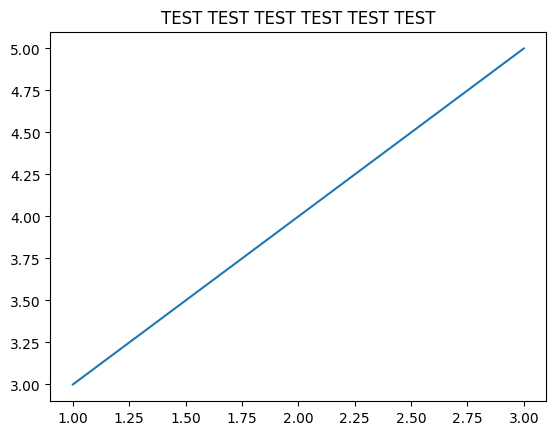

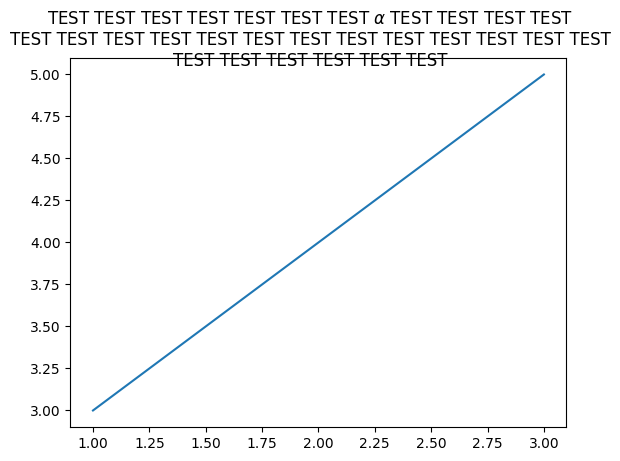

{'_stale': False,
 'stale_callback': <function matplotlib.figure._stale_figure_callback(self, val)>,
 '_axes': None,
 'figure': <Figure size 640x480 with 1 Axes>,
 '_transform': <matplotlib.transforms.BboxTransformTo at 0x1a4ae6ca7c0>,
 '_transformSet': True,
 '_visible': True,
 '_animated': False,
 '_alpha': None,
 'clipbox': None,
 '_clippath': None,
 '_clipon': True,
 '_label': '',
 '_picker': None,
 '_rasterized': False,
 '_agg_filter': None,
 '_mouseover': False,
 '_callbacks': <matplotlib.cbook.CallbackRegistry at 0x1a4ae6b0190>,
 '_remove_method': <function list.remove(value, /)>,
 '_url': None,
 '_gid': None,
 '_snap': None,
 '_sketch': None,
 '_path_effects': [],
 '_sticky_edges': _XYPair(x=[], y=[]),
 '_in_layout': True,
 '_x': 0.5,
 '_y': 0.98,
 '_text': 'TEST TEST TEST TEST TEST TEST TEST $\\alpha$ TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST',
 '_color': 'black',
 '_fontproperties': <matplotlib.font_mana

In [13]:
from matplotlib import pyplot as plt

plt.plot([1,2,3],[3,4,5])
tit = plt.title("TEST TEST TEST TEST TEST TEST", wrap=True)
plt.show()

title = r'TEST TEST TEST TEST TEST TEST TEST $\alpha$ TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST TEST'

plt.plot([1,2,3],[3,4,5])
tit = plt.suptitle(title, wrap=True)
plt.show()
tit.__dict__